In [1]:
import pandas as pd
import re
import string
# from bs4 import BeautifulSoup
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
from nltk.probability import FreqDist
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install spacy
# !python -m spacy download en_core_web_sm
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [3]:
data_df = pd.read_csv("../rtgender/reddit_responses.csv")

In [4]:
data_df.head()

,op_id,op_gender,post_id,responder_id,response_text,subreddit,responder_gender,responder_gender_visible
0,Kastoli,M,0,Thunda_Storm,or low level. I mean hes wearing black armour ...,2007scape,NaN,unknown_gender
1,Kastoli,M,1,Thunda_Storm,So... Low level,2007scape,NaN,unknown_gender
2,DCBizzle,M,2,minixmatt,"<link> TONK, TONK",2007scape,NaN,unknown_gender
3,ordona,M,3,Namiweso,Thanks I forgot about that place! :),2007scape,NaN,unknown_gender
4,SlayerMaster,M,4,Quantization,Or hes just trolling.,2007scape,NaN,unknown_gender


In [5]:
data_df1 = data_df.copy()

In [6]:
# Load spacy
nlp = spacy.load('en_core_web_sm')

def clean_string(text, stopwords = False, stem="None"):

    final_string = ""

    # Make lower
    text = text.lower()

#     # Remove line breaks
#     text = re.sub(r'\n', '', text)

#     # Remove puncuation
#     translator = str.maketrans('', '', string.punctuation)
#     text = text.translate(translator)

    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\S+www\S+', '', text)
    
    
    # Remove stop words
    text = text.split()
    text_filtered = text
    if stopwords == True:
        useless_words = nltk.corpus.stopwords.words("english")
#         useless_words = useless_words + ['hi', 'im']

        text_filtered = [word for word in text if not word in useless_words]

        # Remove numbers
        text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]
#     else:
#         text_filtered = text
    # Stem or Lemmatize
    if stem == 'Stem':
        stemmer = PorterStemmer() 
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    elif stem == 'Spacy':
        text_filtered = nlp(' '.join(text_filtered))
        text_stemmed = [y.lemma_ for y in text_filtered]
    else:
        text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string

In [7]:
data_df2 = data_df.copy()

In [8]:
data_df2['response_text'] = data_df2['response_text'].astype(str)

In [9]:
import swifter
data_df2['response_text_cleaned'] = data_df2['response_text'].swifter.apply(lambda x: clean_string(x, stopwords = True, stem='Lem'))


Pandas Apply:   0%|          | 0/1453512 [00:00<?, ?it/s]

In [10]:
data_df2['response_text_cleaned']

0            low level. mean he wearing black armour sooo...
1                                            so... low level
2                                          <link> tonk, tonk
3                                    thanks forgot place! :)
4                                               he trolling.
                                 ...                        
1453507    find best tacticals getting around open map qu...
1453508                                                 why?
1453509       wish would make sport game pc too. fifa get :/
1453510                               thats true. good point
1453511    im fully aware this. almost every lego game pl...
Name: response_text_cleaned, Length: 1453512, dtype: object

In [11]:
data_df2['response_text_cleaned1'] = data_df2['response_text_cleaned'].str.split()

In [12]:
data_df2['response_text_cleaned1']

0          [low, level., mean, he, wearing, black, armour...
1                                        [so..., low, level]
2                                      [<link>, tonk,, tonk]
3                               [thanks, forgot, place!, :)]
4                                            [he, trolling.]
                                 ...                        
1453507    [find, best, tacticals, getting, around, open,...
1453508                                               [why?]
1453509    [wish, would, make, sport, game, pc, too., fif...
1453510                          [thats, true., good, point]
1453511    [im, fully, aware, this., almost, every, lego,...
Name: response_text_cleaned1, Length: 1453512, dtype: object

In [13]:
data_df2['response_text_cleaned']

0            low level. mean he wearing black armour sooo...
1                                            so... low level
2                                          <link> tonk, tonk
3                                    thanks forgot place! :)
4                                               he trolling.
                                 ...                        
1453507    find best tacticals getting around open map qu...
1453508                                                 why?
1453509       wish would make sport game pc too. fifa get :/
1453510                               thats true. good point
1453511    im fully aware this. almost every lego game pl...
Name: response_text_cleaned, Length: 1453512, dtype: object

In [14]:
data_df2.to_csv("./preprocessed_data/reddit_response_preprocssed_Lem_stopwords_removal1.csv")

In [15]:
all_words1 = ''
# for i, row in data_df1.iterrows():
#     all_words = all_words + row['response_text_cleaned']
# data_df2['common'] = 1
# all_words = data_df2.groupby(['op_gender'])['response_text_cleaned'].transform(lambda x : ' '.join(x)).reset_index()
all_words = data_df2.groupby(['op_gender', 'responder_gender']).agg({'response_text_cleaned': ' '.join}).reset_index()
# all_words = data_df1['response_text_cleaned1'].astype(str).apply(''.join)
print(all_words)
# data_df1['response_text_cleaned'].apply(lambda x: clean_string(x, stopwords = False, stem='Stem'))


  op_gender responder_gender  \
0         M                M   
1         M                W   
2         W                M   
3         W                W   

                               response_text_cleaned  
0  dont know youre downvoted, work well. annoying...  
1  ill admit im mostly annoyed discussion another...  
2  never liked term gamer. wtf mean? ive never he...  
3  awww yeah, biology ftw! graduated last semeste...  


In [16]:
all_words[all_words['op_gender']=='M']['response_text_cleaned']

0    dont know youre downvoted, work well. annoying...
1    ill admit im mostly annoyed discussion another...
Name: response_text_cleaned, dtype: object

In [17]:
#the NLTK FreqDist gives a count for how often each part of the text occurs
fd_wct1_op_M_res_M = FreqDist(all_words[((all_words['op_gender']=='M') & (all_words['responder_gender']=='M'))]['response_text_cleaned'].values[0].split())
# fd_wct1_M

In [18]:
#the NLTK FreqDist gives a count for how often each part of the text occurs
fd_wct1_op_M_res_F = FreqDist(all_words[((all_words['op_gender']=='M') & (all_words['responder_gender']=='W'))]['response_text_cleaned'].values[0].split())
# fd_wct1_M

In [19]:
#the NLTK FreqDist gives a count for how often each part of the text occurs
fd_wct1_op_F_res_M = FreqDist(all_words[((all_words['op_gender']=='W') & (all_words['responder_gender']=='M'))]['response_text_cleaned'].values[0].split())
# fd_wct1_M

In [20]:
#the NLTK FreqDist gives a count for how often each part of the text occurs
fd_wct1_op_F_res_F = FreqDist(all_words[((all_words['op_gender']=='W') & (all_words['responder_gender']=='W'))]['response_text_cleaned'].values[0].split())
# fd_wct1_M

In [21]:
## http://mindseye.sharonhoward.org/posts/my-new-favourite-thing-weighted-log-odds-ratios/
## https://bookdown.org/Maxine/tidy-text-mining/weighted-log-odds-ratio.html

In [22]:
print(fd_wct1_op_M_res_M.most_common(40))


[('like', 12843), ('dont', 11783), ('im', 11434), ('get', 9400), ('people', 9127), ('would', 8193), ('think', 7916), ('one', 7641), ('thats', 6630), ('make', 6064), ('youre', 5909), ('know', 5659), ('woman', 5658), ('really', 5417), ('want', 5191), ('thing', 5022), ('even', 4810), ('good', 4633), ('time', 4620), ('it.', 4501), ('much', 4257), ('go', 4193), ('say', 3989), ('ive', 3832), ('>', 3775), ('going', 3660), ('doesnt', 3608), ('see', 3585), ('guy', 3529), ('way', 3527), ('still', 3502), ('never', 3466), ('someone', 3446), ('could', 3382), ('also', 3366), ('something', 3344), ('lot', 3235), ('need', 3108), ('cant', 3078), ('pretty', 2983)]


In [23]:
print(fd_wct1_op_M_res_F.most_common(40))


[('im', 5113), ('like', 5053), ('dont', 4737), ('think', 3463), ('people', 3411), ('would', 3263), ('get', 3132), ('woman', 3040), ('one', 2503), ('know', 2471), ('thats', 2413), ('want', 2356), ('really', 2352), ('make', 2302), ('guy', 2045), ('youre', 1971), ('thing', 1822), ('even', 1757), ('someone', 1723), ('men', 1668), ('ive', 1624), ('time', 1586), ('feel', 1584), ('say', 1556), ('good', 1493), ('it.', 1483), ('doesnt', 1477), ('go', 1469), ('lot', 1431), ('see', 1417), ('never', 1408), ('way', 1350), ('still', 1345), ('much', 1324), ('also', 1316), ('something', 1243), ('going', 1226), ('-', 1174), ('could', 1153), ('didnt', 1106)]


In [24]:
print(fd_wct1_op_F_res_F.most_common(40))


[('like', 1702), ('im', 1480), ('dont', 1397), ('people', 1148), ('get', 1100), ('would', 1031), ('think', 1018), ('one', 858), ('make', 792), ('really', 775), ('know', 757), ('want', 752), ('thats', 742), ('thing', 647), ('even', 638), ('youre', 607), ('time', 602), ('ive', 576), ('it.', 530), ('feel', 525), ('go', 524), ('someone', 489), ('woman', 485), ('much', 480), ('lot', 480), ('good', 478), ('guy', 478), ('never', 477), ('say', 475), ('still', 467), ('didnt', 466), ('doesnt', 458), ('going', 456), ('could', 445), ('also', 444), ('see', 442), ('need', 434), ('way', 430), ('year', 424), ('something', 415)]


In [25]:
print(fd_wct1_op_F_res_M.most_common(40))


[('like', 4776), ('dont', 4160), ('im', 4009), ('woman', 3095), ('people', 3083), ('would', 2920), ('get', 2918), ('think', 2849), ('one', 2481), ('thats', 2365), ('youre', 2295), ('make', 2119), ('want', 2077), ('know', 2027), ('really', 1909), ('thing', 1845), ('guy', 1805), ('men', 1652), ('even', 1564), ('it.', 1543), ('good', 1517), ('time', 1503), ('go', 1464), ('say', 1463), ('someone', 1459), ('doesnt', 1434), ('much', 1376), ('ive', 1365), ('see', 1356), ('something', 1319), ('feel', 1257), ('>', 1252), ('way', 1234), ('going', 1224), ('never', 1209), ('lot', 1186), ('could', 1169), ('still', 1119), ('girl', 1113), ('also', 1113)]


In [26]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_df2['response_text_cleaned'])
features = vectorizer.get_feature_names_out()
y = data_df2['op_gender']

In [27]:
print(features[:30])

['__' '___' '____' '_____' '______' '_______' '________' '_________'
 '__________' '___________' '____________' '_____________'
 '______________' '_______________' '_________________'
 '__________________' '___________________' '____________________'
 '_____________________' '_______________________'
 '________________________' '__________________________'
 '____________________________' '_____________________________'
 '______________________________' '__________________________________'
 '___________________________________'
 '______________________________________'
 '________________________________________'
 '_____________________________________________']


In [28]:
X.shape, len(y), len(features)

((1453512, 248202), 1453512, 248202)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.predict(X[:2, :]))
print(clf.predict_proba(X[:2, :]))
# >>> clf.score(X, y)

['M' 'M']
[[0.83250705 0.16749295]
 [0.81350666 0.18649334]]


In [31]:
y[:2]

0    M
1    M
Name: op_gender, dtype: object

In [32]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid = dict(penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=5,  shuffle = True, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.790349 using {'C': 0.01, 'penalty': 'l2'}
0.784274 (0.001022) with: {'C': 100, 'penalty': 'l2'}
0.784605 (0.000430) with: {'C': 10, 'penalty': 'l2'}
0.786564 (0.000397) with: {'C': 1.0, 'penalty': 'l2'}
0.789663 (0.000254) with: {'C': 0.1, 'penalty': 'l2'}
0.790349 (0.000129) with: {'C': 0.01, 'penalty': 'l2'}


In [33]:
test_pred = grid_result.predict(X_test)
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, test_pred)
print("test accuracy : ", test_acc)

test accuracy :  0.7899466079026976


In [34]:
all_pred = grid_result.predict(X)
from sklearn.metrics import accuracy_score
all_acc = accuracy_score(y, all_pred)
print("overall accuracy : ", all_acc)

overall accuracy :  0.7911059557815828


In [35]:
grid_result.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [36]:
# get importance
importance = grid_result.best_estimator_.coef_[0]
feature_importance = pd.DataFrame({"importance":importance, "features":features})
feature_importance

,importance,features
0,-0.046352,__
1,0.051278,___
2,0.087678,____
3,-0.092975,_____
4,-0.025628,______
...,...,...
248197,-0.002085,ﾉﾞ
248198,-0.004170,ﾉﾞヾ
248199,-0.006254,ﾟдﾟ
248200,-0.009733,ﾟヮﾟ


In [37]:
feature_importance.sort_values(['importance'],  key=abs, inplace=True)
feature_importance


,importance,features
208040,0.000000,summering
135128,0.000000,mersenne
220707,0.000000,trepination
135122,0.000000,merryl
220704,0.000000,trepanation
...,...,...
212659,-0.471029,team
122256,-0.507450,lebron
27461,0.516415,bra
211546,0.520648,tampon


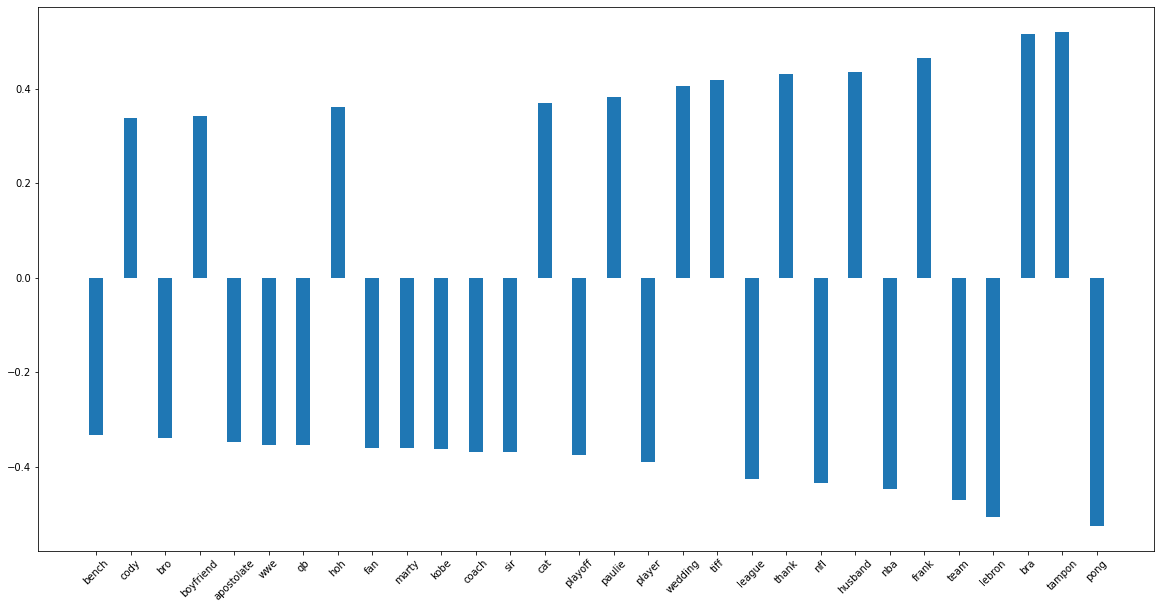

In [38]:
# plot feature importance
plt.figure(figsize=(20, 10))
plt.bar(feature_importance['features'][-30:], feature_importance['importance'][-30:], width = 0.4)
plt.xticks(rotation=45)
plt.show()

In [39]:
# visualize most freuquent words

In [40]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_df2['response_text_cleaned'])
features = vectorizer.get_feature_names_out()
y = data_df2['op_gender']

In [41]:
print(features[:30])

['__' '___' '____' '_____' '______' '_______' '________' '_________'
 '__________' '___________' '____________' '_____________'
 '______________' '_______________' '_________________'
 '__________________' '___________________' '____________________'
 '_____________________' '_______________________'
 '________________________' '__________________________'
 '____________________________' '_____________________________'
 '______________________________' '__________________________________'
 '___________________________________'
 '______________________________________'
 '________________________________________'
 '_____________________________________________']


In [42]:
X.shape, len(y), len(features)

((1453512, 248202), 1453512, 248202)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.predict(X[:2, :]))
print(clf.predict_proba(X[:2, :]))
# >>> clf.score(X, y)

['M' 'M']
[[0.85918148 0.14081852]
 [0.88075632 0.11924368]]


In [45]:
y[:2]

0    M
1    M
Name: op_gender, dtype: object

In [46]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid = dict(penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=5,  shuffle = True, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.790585 using {'C': 0.1, 'penalty': 'l2'}
0.785759 (0.002436) with: {'C': 100, 'penalty': 'l2'}
0.786723 (0.001354) with: {'C': 10, 'penalty': 'l2'}
0.790334 (0.000267) with: {'C': 1.0, 'penalty': 'l2'}
0.790585 (0.000186) with: {'C': 0.1, 'penalty': 'l2'}
0.790340 (0.000014) with: {'C': 0.01, 'penalty': 'l2'}


In [47]:
test_pred = grid_result.predict(X_test)
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, test_pred)
print("test accuracy : ", test_acc)

test accuracy :  0.790163428602403


In [48]:
all_pred = grid_result.predict(X)
from sklearn.metrics import accuracy_score
all_acc = accuracy_score(y, all_pred)
print("overall accuracy : ", all_acc)

overall accuracy :  0.7907722812057967


In [49]:
grid_result.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [50]:
# get importance
importance = grid_result.best_estimator_.coef_[0]
feature_importance = pd.DataFrame({"importance":importance, "features":features})
feature_importance

,importance,features
0,-0.117727,__
1,0.229516,___
2,0.202058,____
3,-0.197179,_____
4,-0.066742,______
...,...,...
248197,-0.002399,ﾉﾞ
248198,-0.004798,ﾉﾞヾ
248199,-0.006995,ﾟдﾟ
248200,-0.060053,ﾟヮﾟ


In [51]:
feature_importance.sort_values(['importance'],  key=abs, inplace=True)
feature_importance


,importance,features
59450,0.000000,dothan
227184,0.000000,unproffessional
207721,0.000000,sufficent
106296,0.000000,inhavited
207723,0.000000,sufficience
...,...,...
82466,-1.891595,game
27461,1.935630,bra
101194,2.144076,husband
164271,-2.546406,player


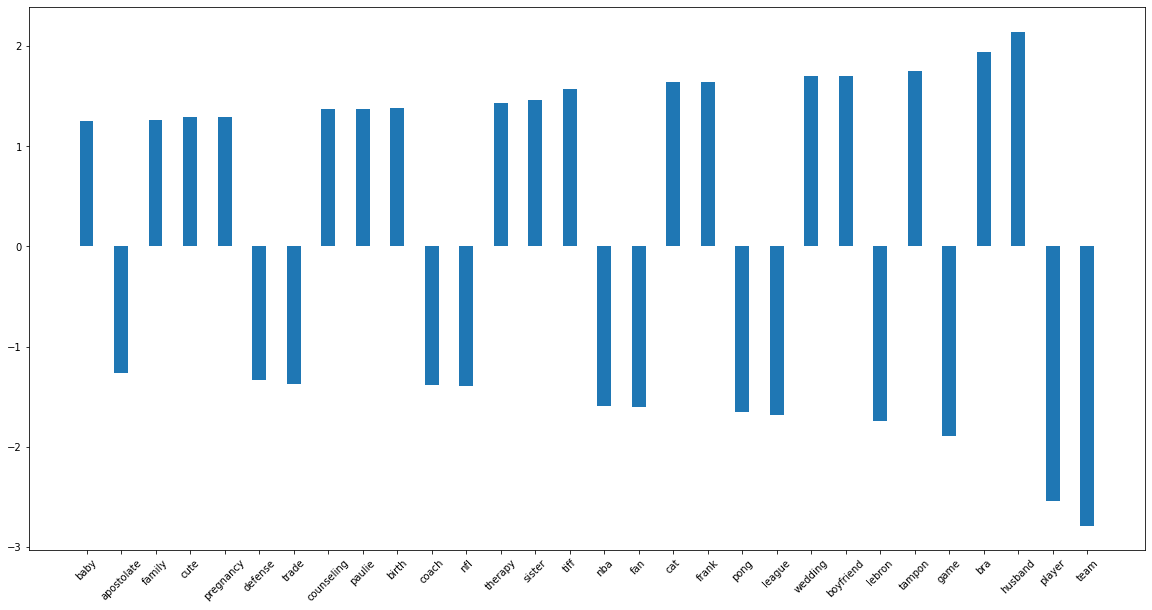

In [52]:
# plot feature importance
plt.figure(figsize=(20, 10))
plt.bar(feature_importance['features'][-30:], feature_importance['importance'][-30:], width = 0.4)
plt.xticks(rotation=45)
plt.show()

In [53]:
# visualize most freuquent words

In [54]:
all_words

,op_gender,responder_gender,response_text_cleaned
0,M,M,"dont know youre downvoted, work well. annoying..."
1,M,W,ill admit im mostly annoyed discussion another...
2,W,M,never liked term gamer. wtf mean? ive never he...
3,W,W,"awww yeah, biology ftw! graduated last semeste..."


In [55]:
df_op_M_res_M = pd.DataFrame(fd_wct1_op_M_res_M.items(), columns=['word', 'n'])
cnt = 0 
total_words_M_M = sum(fd_wct1_op_M_res_M.values())

df_op_M_res_M['total_words'] = total_words_M_M
df_op_M_res_M['gender'] ='op_M_res_M'
df_op_M_res_M


,word,n,total_words,gender
0,dont,11783,1368402,op_M_res_M
1,know,5659,1368402,op_M_res_M
2,youre,5909,1368402,op_M_res_M
3,"downvoted,",12,1368402,op_M_res_M
4,work,2622,1368402,op_M_res_M
...,...,...,...,...
106314,"mp,",1,1368402,op_M_res_M
106315,halo.,1,1368402,op_M_res_M
106316,rebuy,2,1368402,op_M_res_M
106317,dlc...,1,1368402,op_M_res_M


In [56]:
df_op_M_res_F = pd.DataFrame(fd_wct1_op_M_res_F.items(), columns=['word', 'n'])
cnt = 0 
total_words_M_F = sum(fd_wct1_op_M_res_F.values())

df_op_M_res_F['total_words'] = total_words_M_F
df_op_M_res_F['gender'] ='op_M_res_F'
df_op_M_res_F

,word,n,total_words,gender
0,ill,543,477726,op_M_res_F
1,admit,65,477726,op_M_res_F
2,im,5113,477726,op_M_res_F
3,mostly,160,477726,op_M_res_F
4,annoyed,23,477726,op_M_res_F
...,...,...,...,...
51097,layer.,1,477726,op_M_res_F
51098,glue,1,477726,op_M_res_F
51099,armenia,1,477726,op_M_res_F
51100,levant,1,477726,op_M_res_F


In [57]:
df_op_F_res_F = pd.DataFrame(fd_wct1_op_F_res_F.items(), columns=['word', 'n'])
cnt = 0 
total_words_F_F = sum(fd_wct1_op_F_res_F.values())

df_op_F_res_F['total_words'] = total_words_F_F
df_op_F_res_F['gender'] ='op_F_res_F'
df_op_F_res_F

,word,n,total_words,gender
0,awww,4,160530,op_F_res_F
1,"yeah,",216,160530,op_F_res_F
2,biology,2,160530,op_F_res_F
3,ftw!,1,160530,op_F_res_F
4,graduated,7,160530,op_F_res_F
...,...,...,...,...
25986,cubicle,1,160530,op_F_res_F
25987,aromas.,1,160530,op_F_res_F
25988,por,1,160530,op_F_res_F
25989,dos?,1,160530,op_F_res_F


In [58]:
df_op_F_res_M = pd.DataFrame(fd_wct1_op_F_res_M.items(), columns=['word', 'n'])
cnt = 0 
total_words_F_M = sum(fd_wct1_op_F_res_M.values())

df_op_F_res_M['total_words'] = total_words_F_M
df_op_F_res_M['gender'] ='op_F_res_M'
df_op_F_res_M

,word,n,total_words,gender
0,never,1209,453036,op_F_res_M
1,liked,68,453036,op_F_res_M
2,term,234,453036,op_F_res_M
3,gamer.,2,453036,op_F_res_M
4,wtf,18,453036,op_F_res_M
...,...,...,...,...
49864,stabbed.,1,453036,op_F_res_M
49865,solange!,1,453036,op_F_res_M
49866,polishing,1,453036,op_F_res_M
49867,turd?,1,453036,op_F_res_M


In [59]:
df_all_for_R = pd.concat([df_op_M_res_M, df_op_M_res_F, df_op_F_res_M, df_op_F_res_F])
df_all_for_R

,word,n,total_words,gender
0,dont,11783,1368402,op_M_res_M
1,know,5659,1368402,op_M_res_M
2,youre,5909,1368402,op_M_res_M
3,"downvoted,",12,1368402,op_M_res_M
4,work,2622,1368402,op_M_res_M
...,...,...,...,...
25986,cubicle,1,160530,op_F_res_F
25987,aromas.,1,160530,op_F_res_F
25988,por,1,160530,op_F_res_F
25989,dos?,1,160530,op_F_res_F


In [60]:
df_all_for_R.to_csv("./preprocessed_data/reddit_responses_preprocressed_for_R_Lemma1.csv")

In [61]:
df_all_for_R.gender.unique()

array(['op_M_res_M', 'op_M_res_F', 'op_F_res_M', 'op_F_res_F'],
      dtype=object)

In [62]:
# after runing R code

In [63]:
weighted_log_odds_df = pd.read_csv("./preprocessed_data/reddit_responses_weighted_log_odds.csv")
weighted_log_odds_df.sort_values(['log_odds_weighted'], inplace=True)

In [64]:
weighted_log_odds_df = weighted_log_odds_df.dropna()
weighted_log_odds_df

,Unnamed: 0,X,word,n,total_words,gender,log_odds_weighted
454,455,454,woman,5658,1368402,op_M_res_M,-12.454227
159,160,159,im,11434,1368402,op_M_res_M,-10.706269
45,46,45,guy,3529,1368402,op_M_res_M,-10.669857
407,408,407,like,12843,1368402,op_M_res_M,-10.393987
4404,4405,4404,:),585,1368402,op_M_res_M,-9.971704
...,...,...,...,...,...,...,...
207350,207351,60,get,1100,160530,op_F_res_F,7.711154
207347,207348,57,people,1148,160530,op_F_res_F,7.997506
207362,207363,72,dont,1397,160530,op_F_res_F,8.496580
207298,207299,8,im,1480,160530,op_F_res_F,9.014093


In [65]:
weighted_log_odds_df.gender.unique()

array(['op_M_res_M', 'op_M_res_F', 'op_F_res_M', 'op_F_res_F'],
      dtype=object)

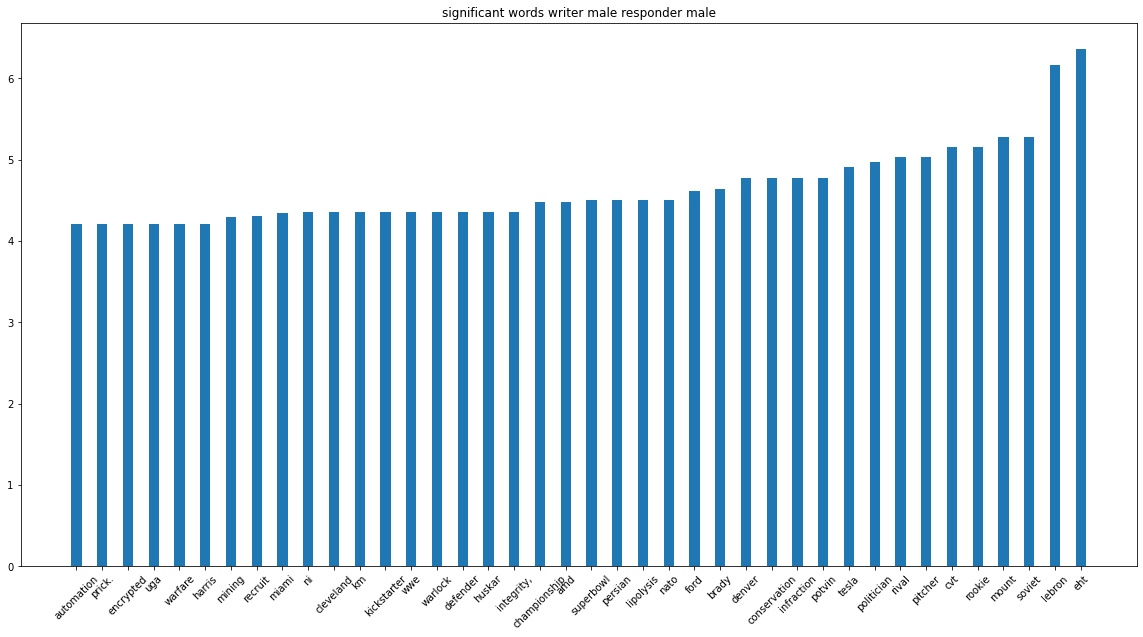

In [66]:
filtered_df = weighted_log_odds_df[weighted_log_odds_df['gender']=='op_M_res_M']
plt.figure(figsize=(20, 10))
plt.bar(filtered_df['word'][-40:], filtered_df['log_odds_weighted'][-40:], width=0.4)
plt.title("significant words writer male responder male")
plt.xticks(rotation=45)
plt.show()

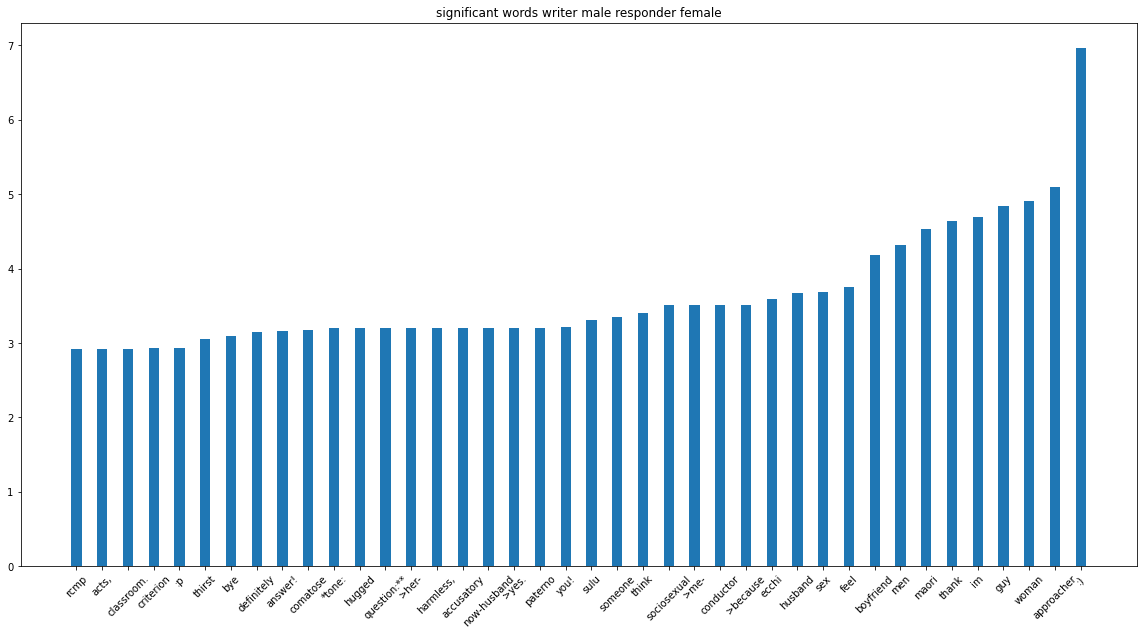

In [67]:
filtered_df = weighted_log_odds_df[weighted_log_odds_df['gender']=='op_M_res_F']
plt.figure(figsize=(20, 10))
plt.bar(filtered_df['word'][-40:], filtered_df['log_odds_weighted'][-40:], width=0.4)
plt.title("significant words writer male responder female")
plt.xticks(rotation=45)
plt.show()

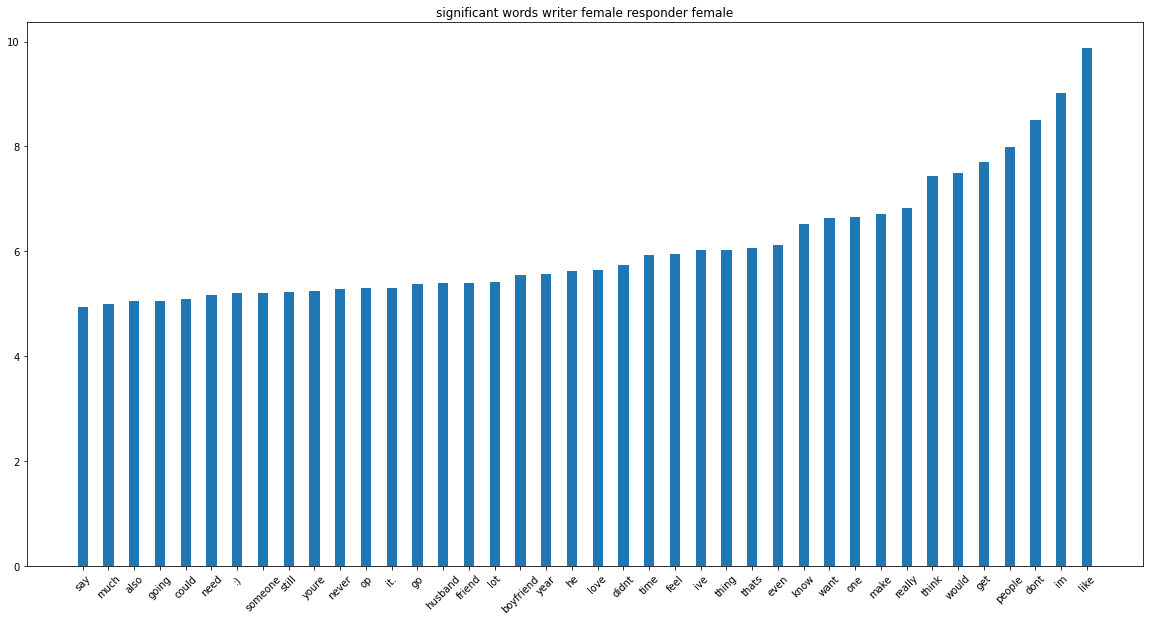

In [68]:
filtered_df = weighted_log_odds_df[weighted_log_odds_df['gender']=='op_F_res_F']
plt.figure(figsize=(20, 10))
plt.bar(filtered_df['word'][-40:], filtered_df['log_odds_weighted'][-40:], width=0.4)
plt.title("significant words writer female responder female")
plt.xticks(rotation=45)
plt.show()

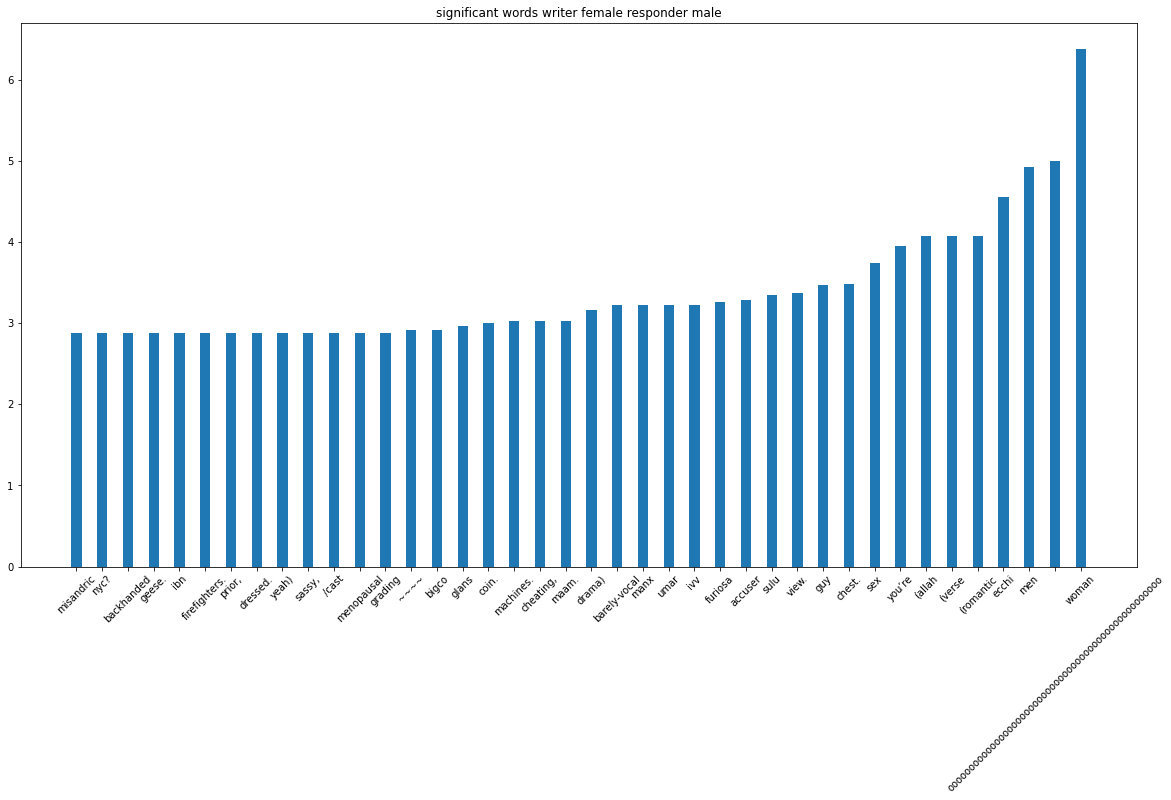

In [69]:
filtered_df = weighted_log_odds_df[weighted_log_odds_df['gender']=='op_F_res_M']
plt.figure(figsize=(20, 10))
plt.bar(filtered_df['word'][-40:], filtered_df['log_odds_weighted'][-40:], width=0.4)
plt.title("significant words writer female responder male")
plt.xticks(rotation=45)
plt.show()